#结构改善
大多数论文都使用了梯度和拉普拉斯作为特征，要么进行回归训练，要么进行系数编码。但是通过以下观察得知，这两种滤波的结果并不令人满意，如果直接用作特征的话得到的内容一定会很模糊。
我这里尝试使用全新的特征进行训练。
1. 首先是要改善训练使用的特征。
2. 其次是改善搜索的难度，和搜索的空间。

In [22]:
# -*- coding: utf-8 -*-
__author__ = 'Zhe'
%pylab inline
import skimage 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from skimage import data
from skimage.transform import rescale
from  scipy.signal import convolve2d
lena = data.lena()

Populating the interactive namespace from numpy and matplotlib


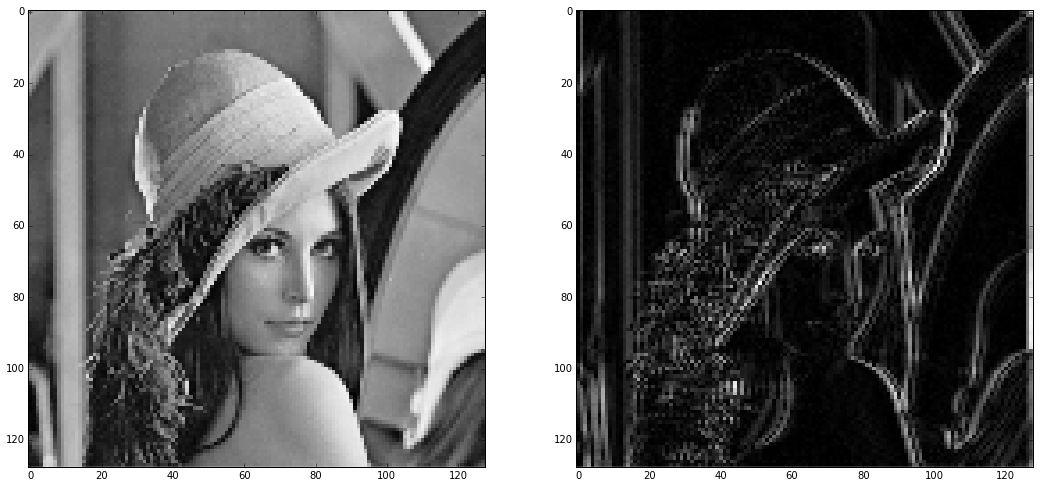

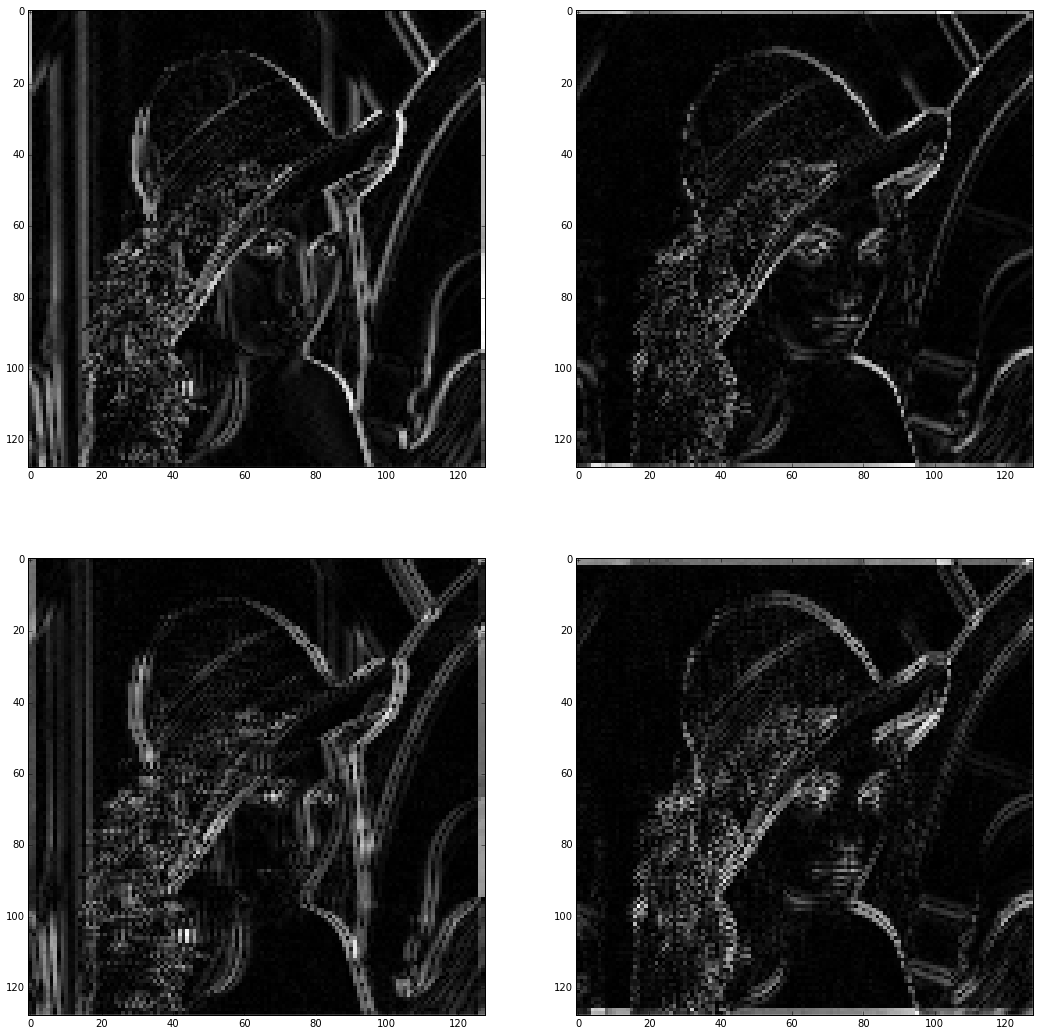

In [277]:
imageH = skimage.color.rgb2gray(data.lena())
imageL = rescale(imageH,0.25,preserve_range=False)
imageW = rescale(imageL,4.0,preserve_range=False)


plt.figure(figsize=(18,18),dpi=14)
plt.subplot(1,2,1)
plt.imshow(imageL, cmap=cm.gray, interpolation="none")

f1=np.asarray([[1,0,-1]],dtype='float64')
f2=np.asarray([[1],[0],[-1]],dtype='float64')
f3=np.asarray([[1,0,-2,0,1]],dtype='float64')
f4=np.asarray([[1],[0],[-2],[0],[1]],dtype='float64')

F1=convolve2d(imageL,f1,mode='same')
F2=convolve2d(imageL,f2,mode='same')
F3=convolve2d(imageL,f3,mode='same')
F4=convolve2d(imageL,f4,mode='same')

HF1=convolve2d(imageH,f1,mode='same')
HF2=convolve2d(imageH,f2,mode='same')
HF3=convolve2d(imageH,f3,mode='same')
HF4=convolve2d(imageH,f4,mode='same')

WF1=convolve2d(imageW,f1,mode='same')
WF2=convolve2d(imageW,f2,mode='same')
WF3=convolve2d(imageW,f3,mode='same')
WF4=convolve2d(imageW,f4,mode='same')

plt.subplot(1,2,2)
plt.imshow(np.abs(F1+F3), cmap=cm.gray, interpolation="none")

plt.figure(figsize=(18,18),dpi=14)
plt.subplot(2,2,1)
plt.imshow(np.abs(F1), cmap=cm.gray, interpolation="none")
plt.subplot(2,2,2)
plt.imshow(np.abs(F2), cmap=cm.gray, interpolation="none")
plt.subplot(2,2,3)
plt.imshow(np.abs(F3), cmap=cm.gray, interpolation="none")
plt.subplot(2,2,4)
plt.imshow(np.abs(F4), cmap=cm.gray, interpolation="none")

In [285]:
def PSNR(A,B):
    MSE= np.sum((A-B)**2)/(A.shape[0]*A.shape[1])
    return 20 *np.log10(np.max(A)/np.sqrt(MSE))

#使用梯度和拉普拉斯抽取的patch特征
结果单一，效果不明显。

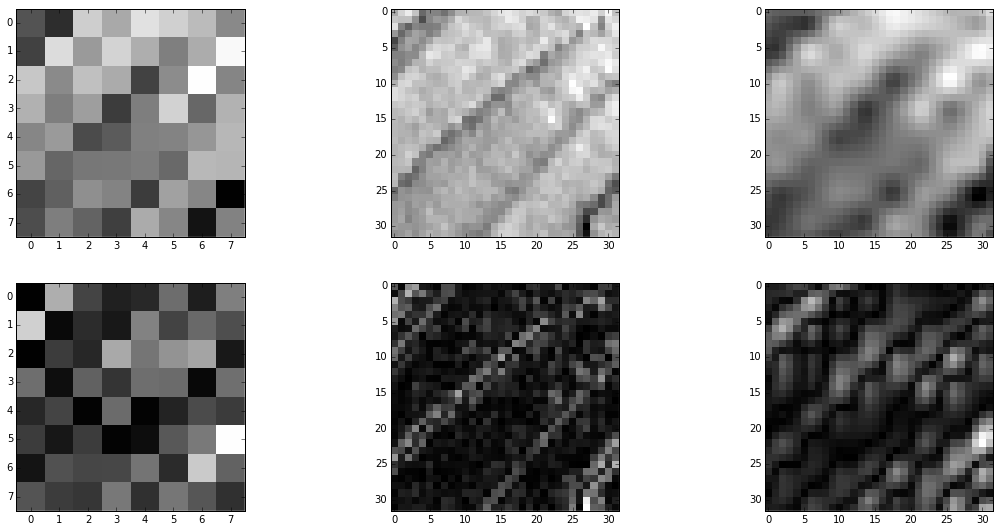

In [278]:
#抽取一个patch进行尝试
y,x = 40,44
patchL = imageL[y:y+8,x:x+8]
patchH = imageH[y*4:y*4+32,x*4:x*4+32]
patchW = imageW[y*4:y*4+32,x*4:x*4+32]

F = F1+F2+F3
HF = HF1+HF2+HF3
WF = WF1+WF2+WF3
G_L = F[y:y+8,x:x+8]
G_H = HF[y*4:y*4+32,x*4:x*4+32]
G_W = WF[y*4:y*4+32,x*4:x*4+32]

plt.figure(figsize=(19,9),dpi=14)
plt.subplot(2,3,1)
plt.imshow(patchL, cmap=cm.gray, interpolation="none")
plt.subplot(2,3,2)
plt.imshow(patchH, cmap=cm.gray, interpolation="none")
plt.subplot(2,3,3)
plt.imshow(patchW, cmap=cm.gray, interpolation="none")

plt.subplot(2,3,4)
plt.imshow(np.abs(G_L), cmap=cm.gray, interpolation="none")
plt.subplot(2,3,5)
plt.imshow(np.abs(G_H), cmap=cm.gray, interpolation="none")
plt.subplot(2,3,6)
plt.imshow(np.abs(G_W), cmap=cm.gray, interpolation="none")

#使用Gabor滤波抽取的patch特征
通过截取不同的频率能够得到不同含义的结果

0.0605417420348 -0.0338669128038


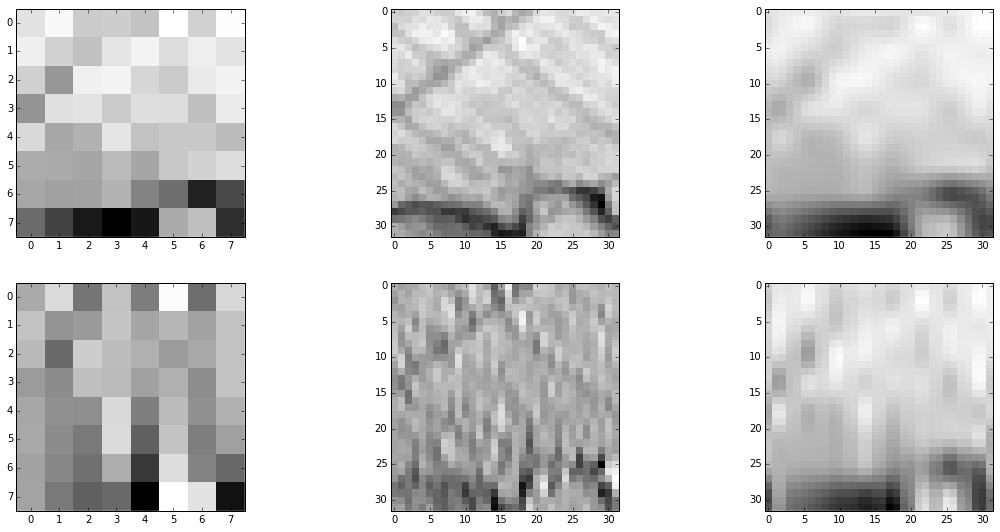

In [298]:
imageH = skimage.color.rgb2gray(data.lena())
imageL = rescale(imageH,0.25,preserve_range=False)
imageW = rescale(imageL,4.0,preserve_range=False)
#抽取一个patch进行尝试
y,x = 36,55
patchL = imageL[y:y+8,x:x+8]
patchH = imageH[y*4:y*4+32,x*4:x*4+32]
patchW = imageW[y*4:y*4+32,x*4:x*4+32]

from skimage.filter import gabor_filter
filt_realH, filt_imagH = gabor_filter(patchH, frequency=0.6)
filt_realL, filt_imagL = gabor_filter(patchL, frequency=0.6)
filt_realW, filt_imagW = gabor_filter(patchW, frequency=0.6)

plt.figure(figsize=(19,9),dpi=14)
plt.subplot(2,3,1)
plt.imshow(patchL, cmap=cm.gray, interpolation="none")
plt.subplot(2,3,2)
plt.imshow(patchH, cmap=cm.gray, interpolation="none")
plt.subplot(2,3,3)
plt.imshow(patchW, cmap=cm.gray, interpolation="none")

plt.subplot(2,3,4)
plt.imshow(np.abs(filt_realL), cmap=cm.gray, interpolation="none")
plt.subplot(2,3,5)
plt.imshow(np.abs(filt_realH), cmap=cm.gray, interpolation="none")
plt.subplot(2,3,6)
plt.imshow(np.abs(filt_realW), cmap=cm.gray, interpolation="none")
print np.max(filt_realH),np.min(filt_realH)

18.9639661623


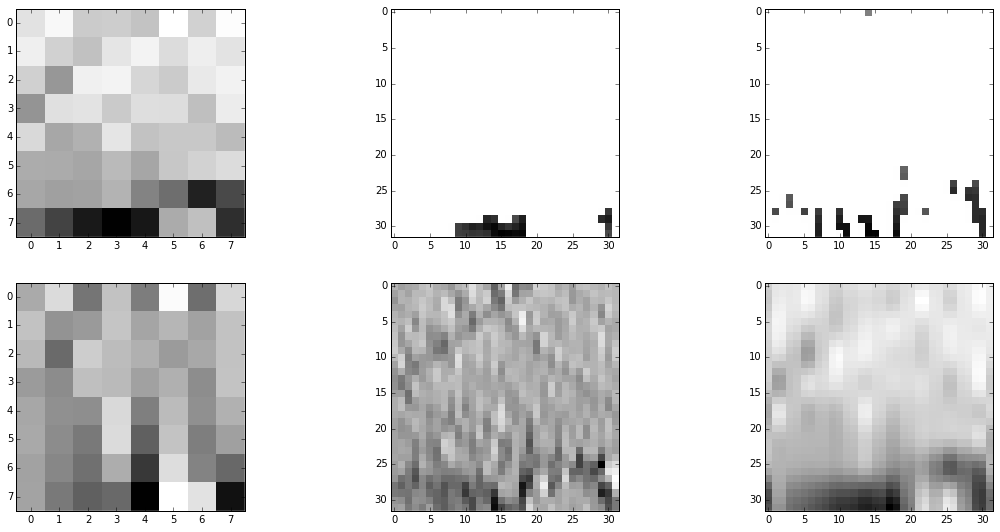

In [310]:
cc=0.024
mask1  = filt_realH>cc
mask2  = filt_realW>cc
patchW[mask1]=1
patchH[mask2]=1
print PSNR(patchW,patchH)
plt.figure(figsize=(19,9),dpi=14)
plt.subplot(2,3,1)
plt.imshow(patchL, cmap=cm.gray, interpolation="none")
plt.subplot(2,3,2)
plt.imshow(patchH, cmap=cm.gray, interpolation="none")
plt.subplot(2,3,3)
plt.imshow(patchW, cmap=cm.gray, interpolation="none")

plt.subplot(2,3,4)
plt.imshow(np.abs(filt_realL), cmap=cm.gray, interpolation="none")
plt.subplot(2,3,5)
plt.imshow(np.abs(filt_realH), cmap=cm.gray, interpolation="none")
plt.subplot(2,3,6)
plt.imshow(np.abs(filt_realW), cmap=cm.gray, interpolation="none")

In [288]:
print patchW

[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]
